In [76]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [77]:
df = pd.read_csv('../data/penguins_size.csv')

In [78]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [79]:
df= df.dropna()

In [80]:
X = pd.get_dummies(df.drop('species',axis=1),drop_first=True)

In [81]:
y = df.species

In [82]:
from sklearn.model_selection import train_test_split

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [84]:
from sklearn.ensemble import RandomForestClassifier

In [85]:
model = RandomForestClassifier(n_estimators=10,random_state=101)

In [86]:
model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10, random_state=101)

In [87]:
preds = model.predict(X_test)

In [88]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix

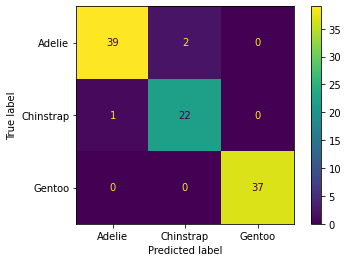

In [89]:
plot_confusion_matrix(model,X_test,y_test)

In [90]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

      Adelie       0.97      0.95      0.96        41
   Chinstrap       0.92      0.96      0.94        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.97       101
   macro avg       0.96      0.97      0.97       101
weighted avg       0.97      0.97      0.97       101



In [91]:
model.feature_importances_

array([0.31867744, 0.1018487 , 0.17343398, 0.21316964, 0.14512091,
       0.03720114, 0.00632264, 0.00422556])

In [92]:
############################################

In [93]:
df = pd.read_csv('../data/data_banknote_authentication.csv')

In [94]:
df.head()

,Variance_Wavelet,Skewness_Wavelet,Curtosis_Wavelet,Image_Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


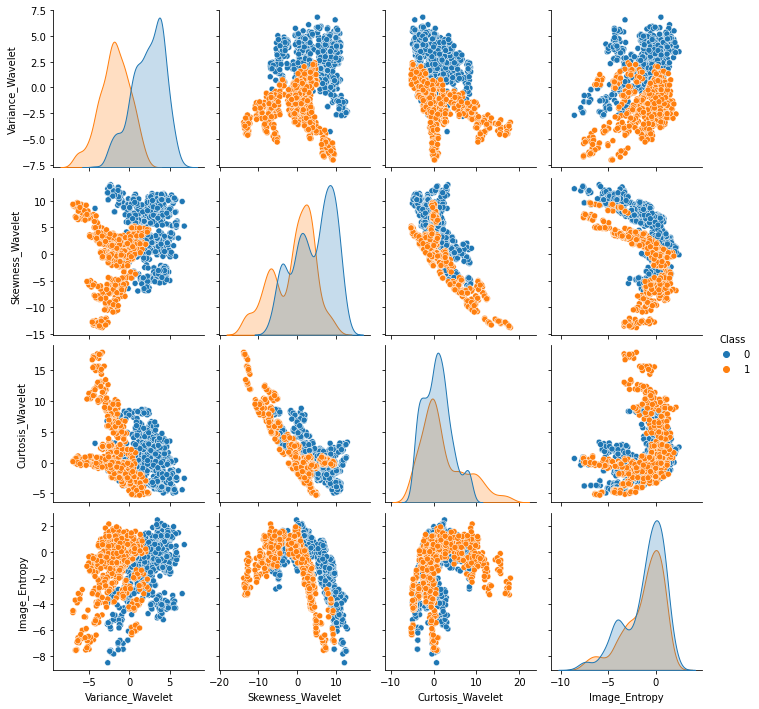

In [95]:
sns.pairplot(df,hue='Class')

In [96]:
X = df.drop('Class',axis=1)

In [97]:
y= df.Class

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

In [99]:
from sklearn.model_selection import GridSearchCV

In [100]:
n_estiamtors = [60,100,140,200]

In [101]:
max_features = [2,3,4]

In [102]:
bootstrap= [True,False]

In [103]:
oobscore = [True,False]

In [104]:
param_grid = {'n_estimators':n_estiamtors, 'max_features' : max_features,
              'bootstrap':bootstrap, 'oob_score':oobscore}

In [105]:
model = RandomForestClassifier()

In [106]:
grid = GridSearchCV(model, param_grid)

In [107]:
grid.fit(X_train,y_train)

C:\Users\pc\anaconda3\envs\ML\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\pc\anaconda3\envs\ML\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\pc\anaconda3\envs\ML\lib\site-packages\sklearn\ensemble\_forest.py", line 351, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\pc\anaconda3\envs\ML\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_features': [2, 3, 4],
                         'n_estimators': [60, 100, 140, 200],
                         'oob_score': [True, False]})

In [108]:
rfc = RandomForestClassifier(max_features=2, n_estimators=200, oob_score=True)

In [109]:
rfc.fit(X_train,y_train)

RandomForestClassifier(max_features=2, n_estimators=200, oob_score=True)

In [110]:
rfc.oob_score_

0.9939965694682675

In [111]:
predictions = rfc.predict(X_test)

In [112]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       124
           1       0.98      1.00      0.99        82

    accuracy                           0.99       206
   macro avg       0.99      0.99      0.99       206
weighted avg       0.99      0.99      0.99       206



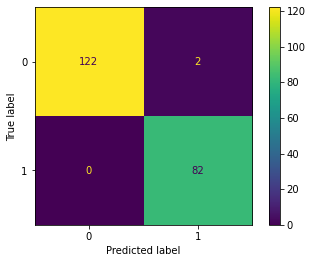

In [113]:
plot_confusion_matrix(rfc, X_test,y_test)

In [114]:
errors = []
from sklearn.metrics import accuracy_score
missclass = []

for n in range(1,200):
    rfc = RandomForestClassifier(n_estimators=n, max_features=2)
    rfc.fit(X_train,y_train)
    preds = rfc.predict(X_test)
    err = 1- accuracy_score(y_test,preds)
    n_mised = np.sum(preds != y_test)

    errors.append(err)
    missclass.append(n_mised)

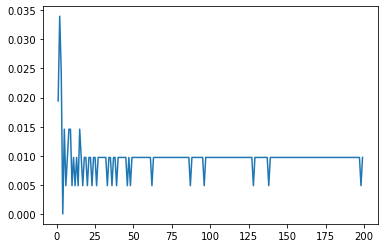

In [115]:
plt.plot(range(1,200),errors)

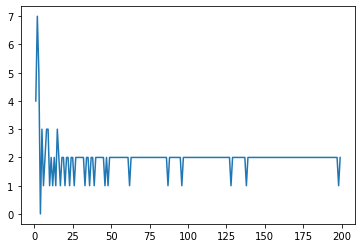

In [116]:
plt.plot(range(1,200),missclass)

In [117]:
##########################################################

In [118]:
df = pd.read_csv('../data/rock_density_xray.csv')

In [119]:
df.head()

,Rebound Signal Strength nHz,Rock Density kg/m3
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


In [120]:
df.columns = ['Signal', 'Density']

<AxesSubplot:xlabel='Signal', ylabel='Density'>

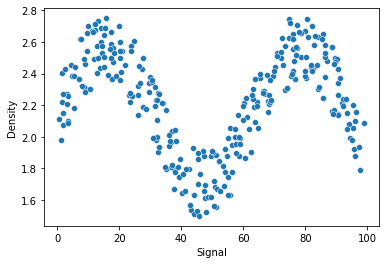

In [121]:
sns.scatterplot(data=df, x='Signal', y='Density')

In [122]:
X = df['Signal'].values.reshape(-1,1)

In [123]:
y = df.Density

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.11, random_state=101)

In [125]:
from sklearn.linear_model import LinearRegression

In [126]:
lr_model = LinearRegression()

In [127]:
lr_model.fit(X_train,y_train)

LinearRegression()

In [128]:
lr_preds = lr_model.predict(X_test)

In [129]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [130]:
mean_absolute_error(y_test,lr_preds)

0.2148304540100693

In [131]:
np.sqrt(mean_squared_error(y_test,lr_preds))

0.2633721934289095

In [132]:
signal_range = np.arange(0,100)

In [133]:
sidnal_preds = lr_model.predict(signal_range.reshape(-1,1))

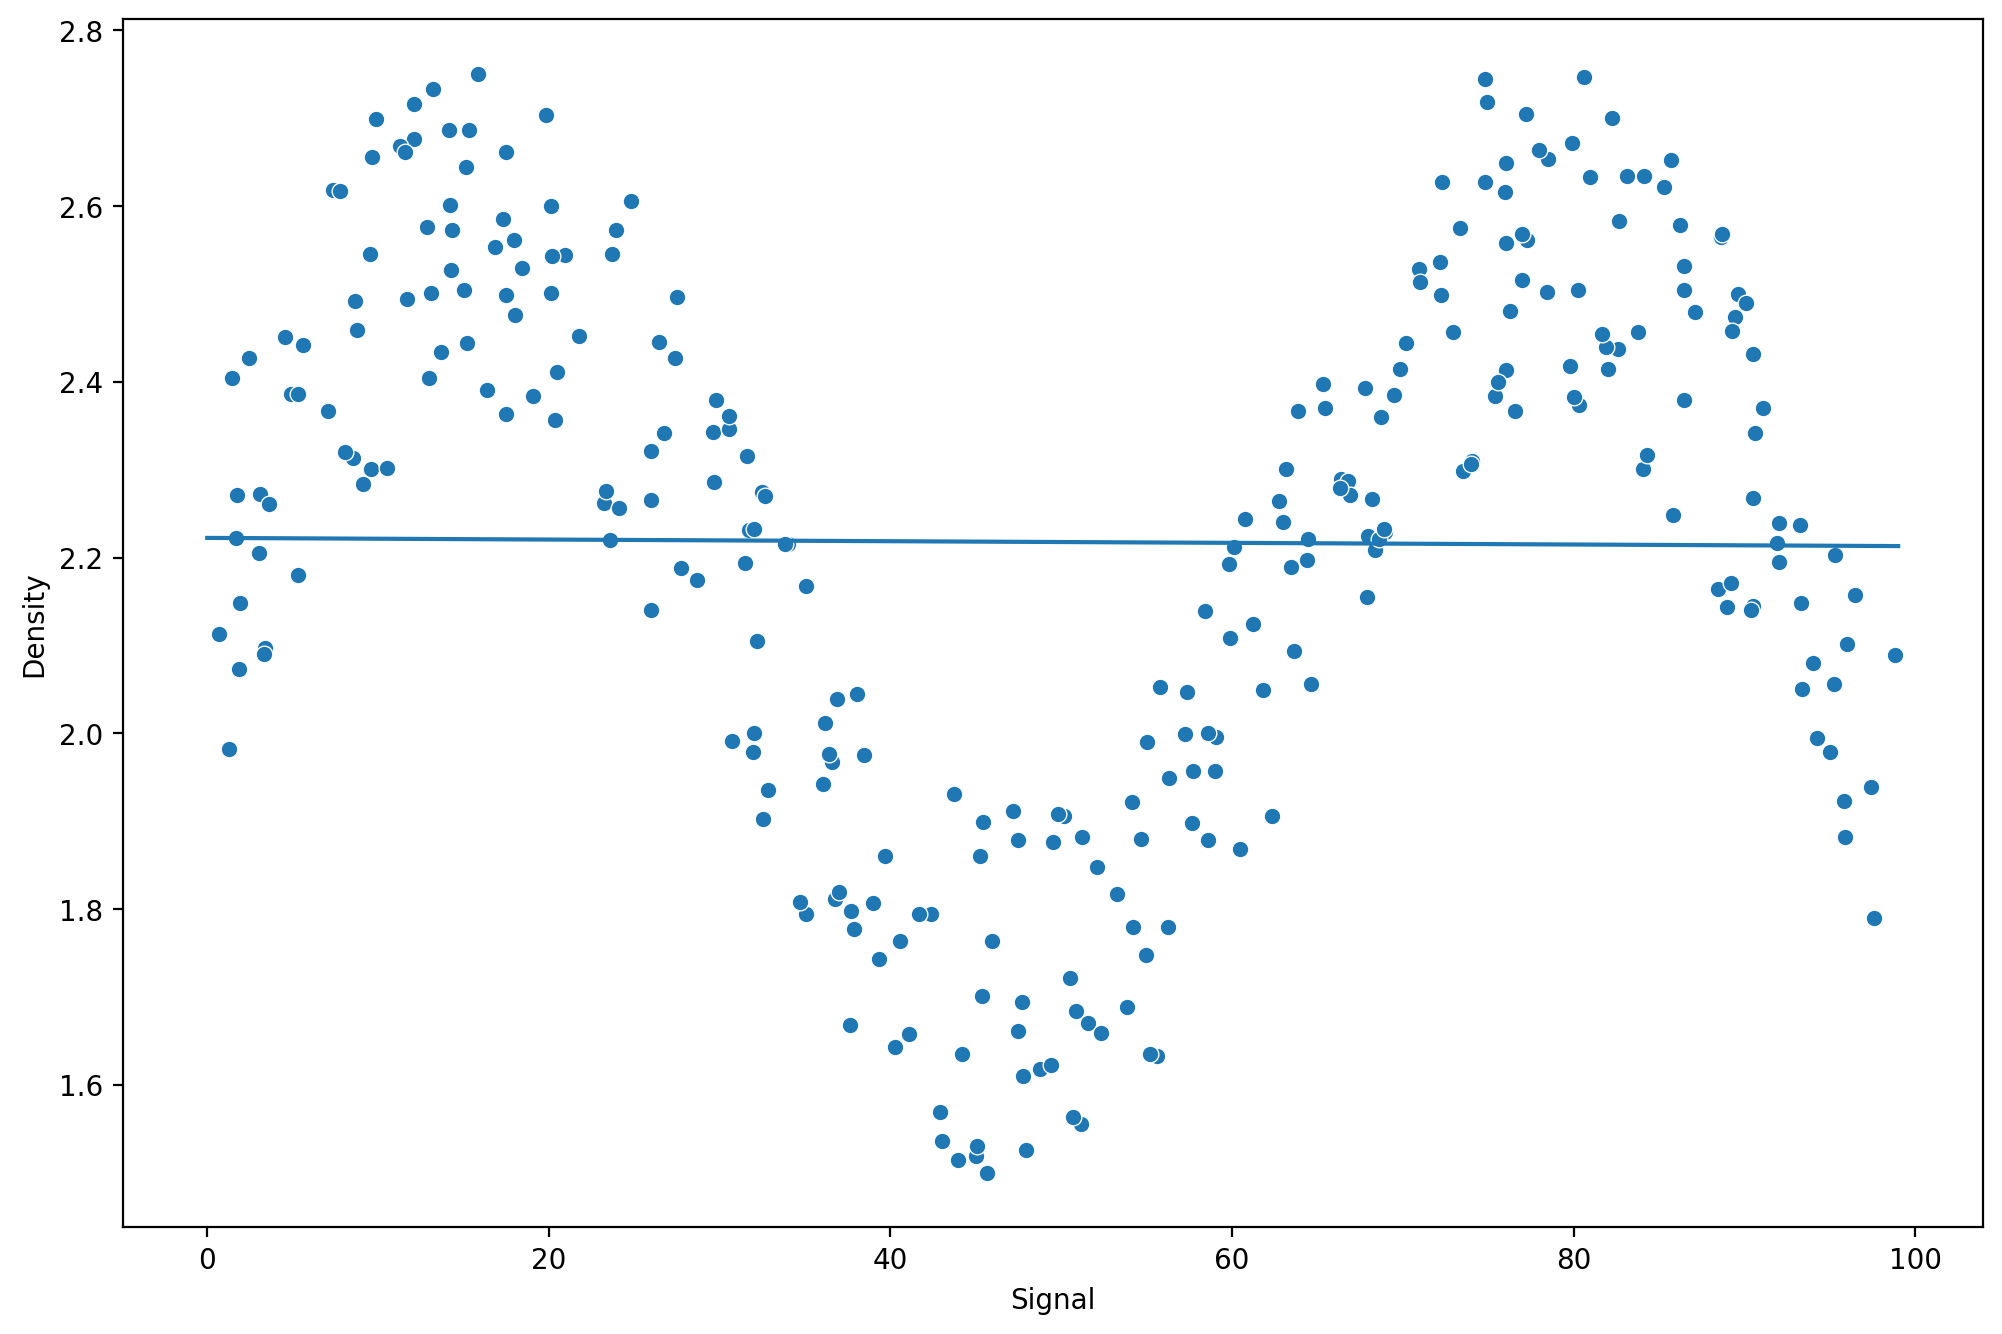

In [136]:
plt.figure(figsize=(12,8), dpi=200)
sns.scatterplot(data=df, x="Signal", y='Density')

plt.plot(signal_range,sidnal_preds)

In [137]:
################################################################

In [138]:
def run_model(model, X_train, y_train, X_test,y_test):
    model.fit(X_train,y_train)

    preds = model.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test,preds))
    mae= mean_absolute_error(y_test,preds)
    print(f'MAE {mae}')
    print(f'RMSE {rmse}')

    signal_range = np.arange(0,100)
    signal_preds = model.predict(signal_range.reshape(-1,1))

    plt.figure(figsize=(12,8), dpi=200)
    sns.scatterplot(data=df, x="Signal", y='Density', color='black')

    plt.plot(signal_range,signal_preds)

In [141]:
from sklearn.pipeline import make_pipeline
from  sklearn.preprocessing import PolynomialFeatures


In [148]:
pipe = make_pipeline(PolynomialFeatures(degree=6), LinearRegression())

MAE 0.12307411619452313
RMSE 0.14107152399414735


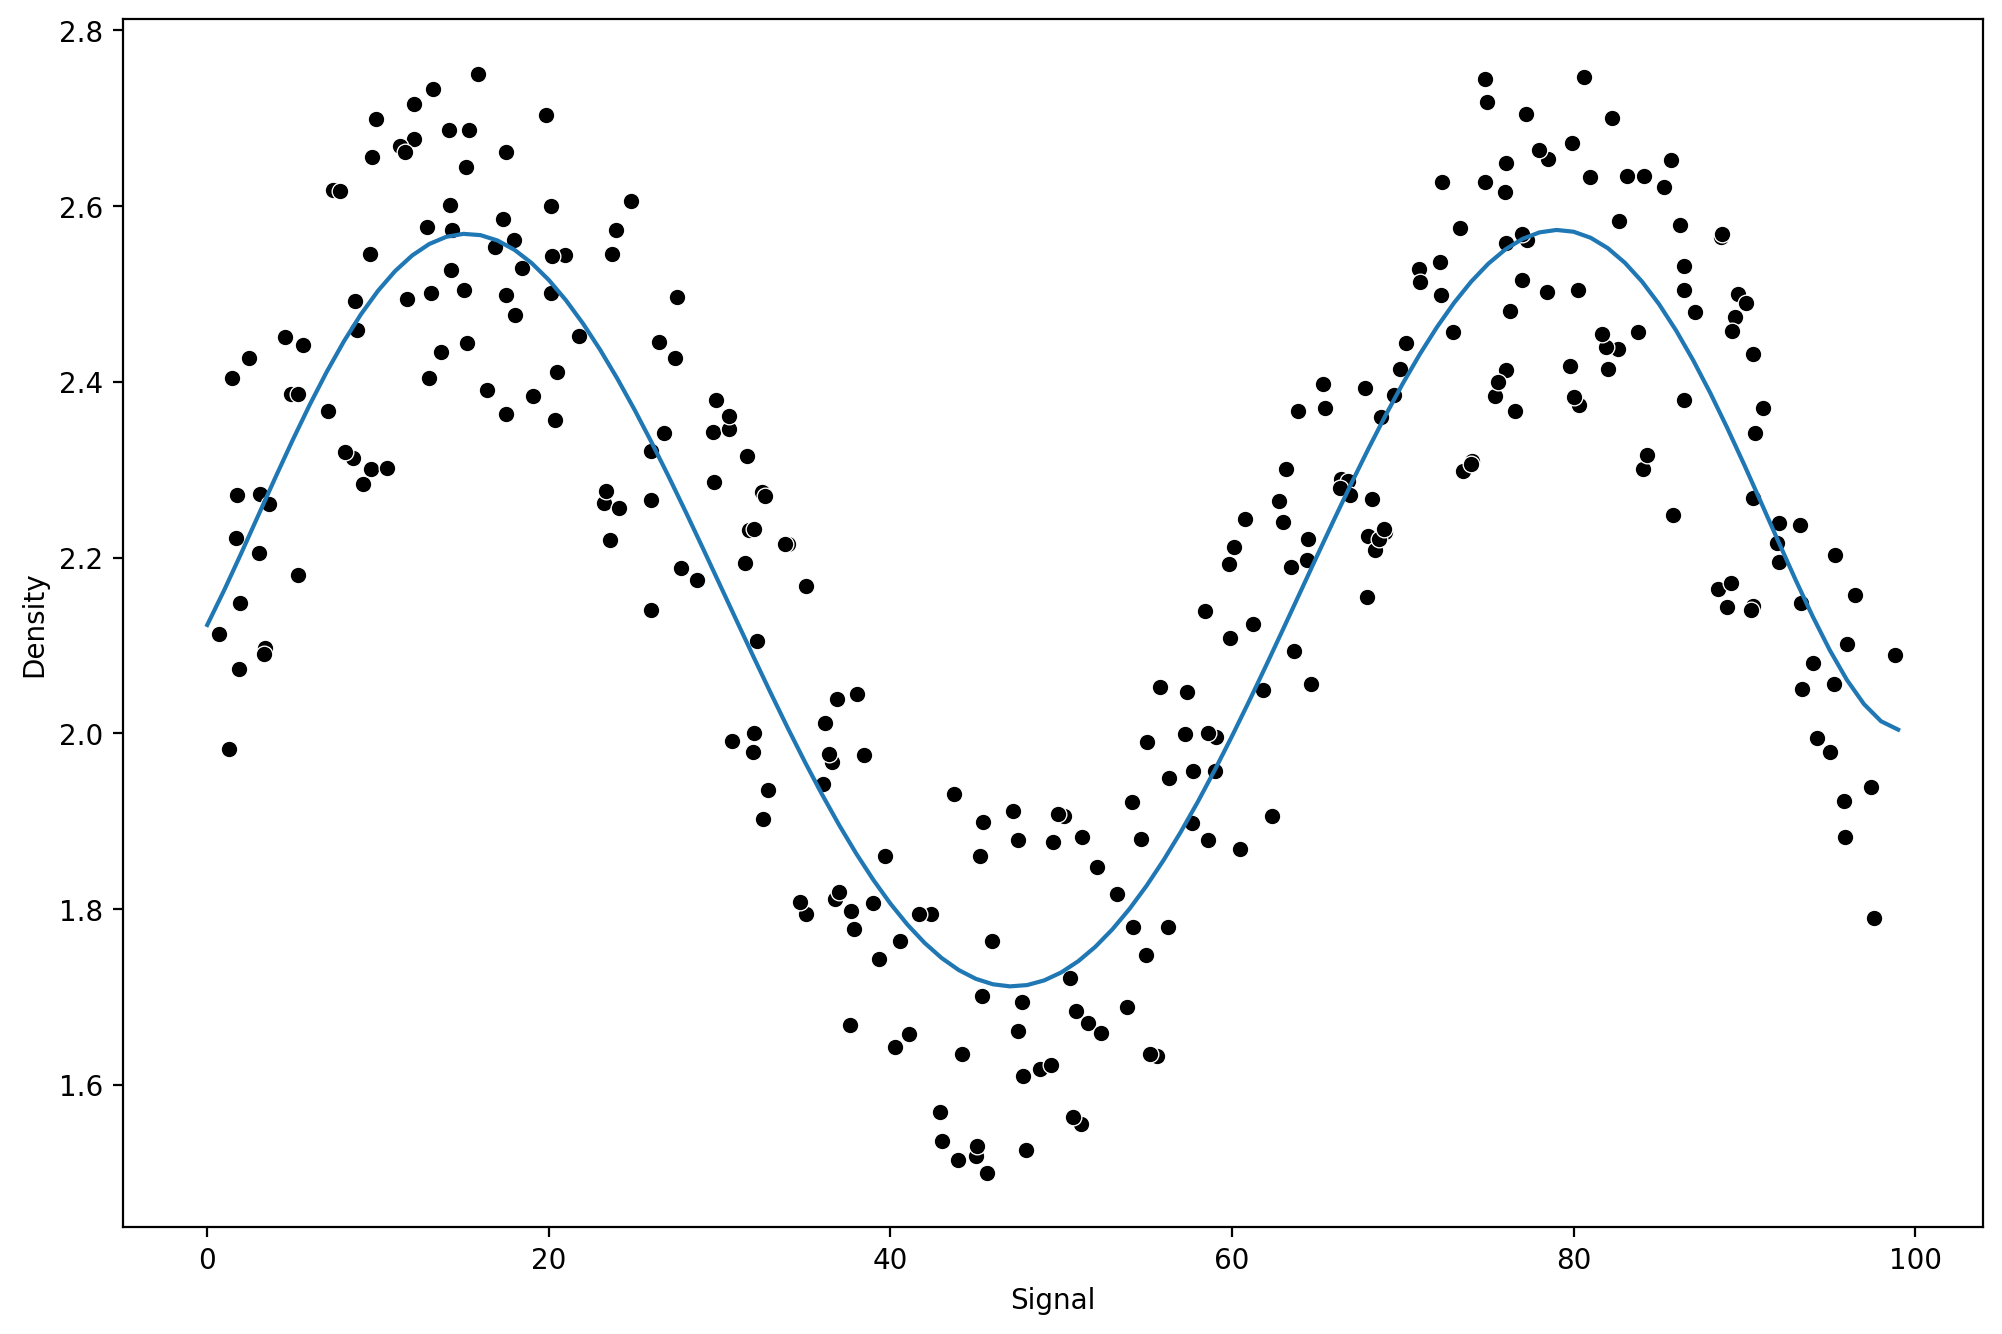

In [149]:

run_model(pipe, X_train, y_train, X_test,y_test)

In [151]:
from sklearn.neighbors import KNeighborsRegressor

MAE 0.1386845280313451
RMSE 0.17873661929385395
MAE 0.13108781477628123
RMSE 0.14748763914888266
MAE 0.11977478613958308
RMSE 0.1385184043816121
MAE 0.13228329406133624
RMSE 0.15423681904554506


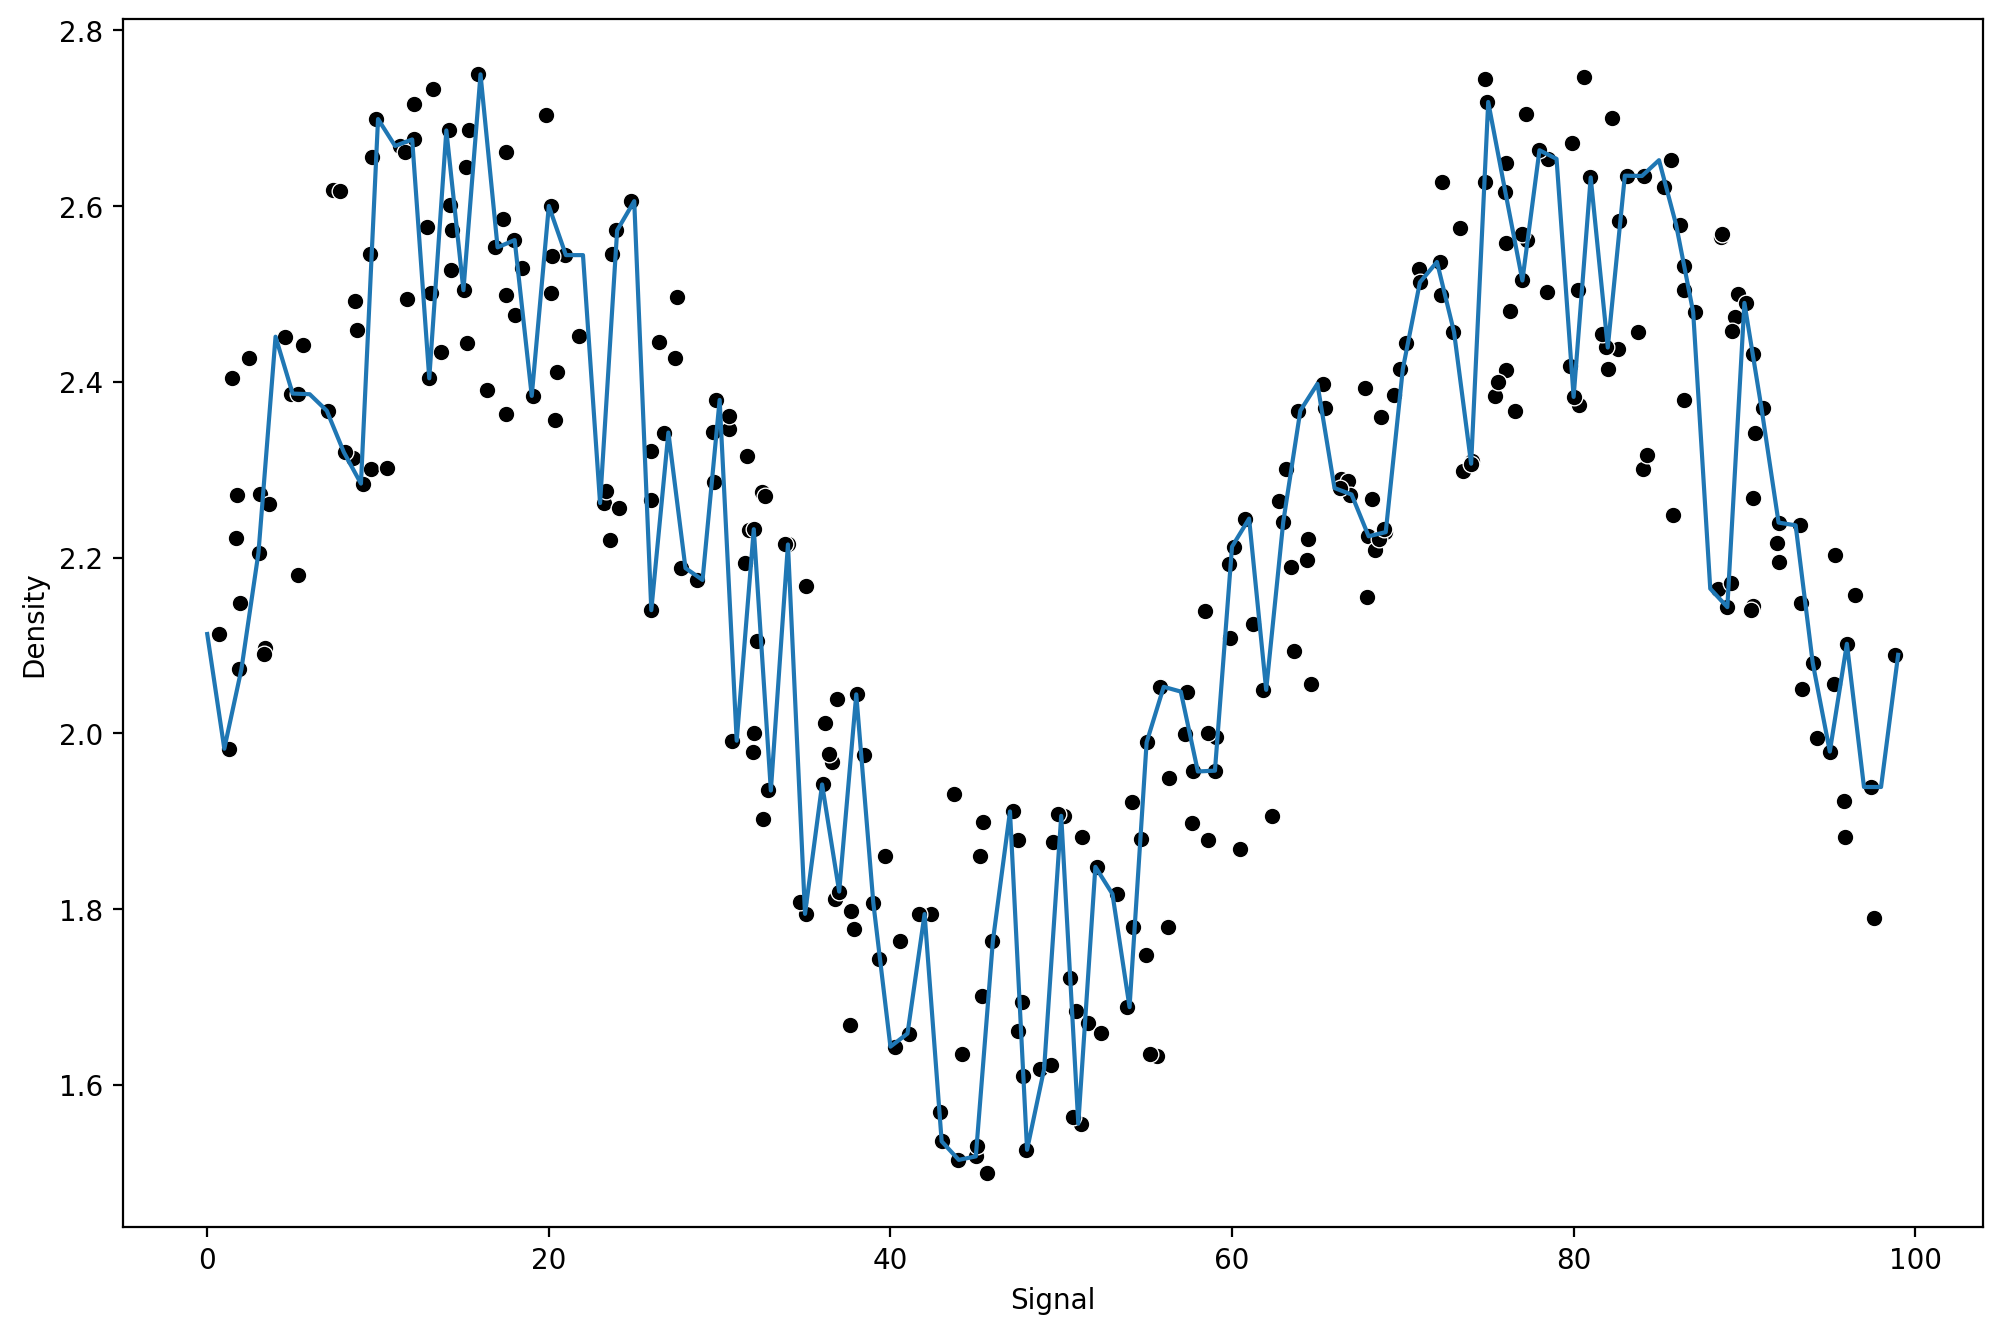

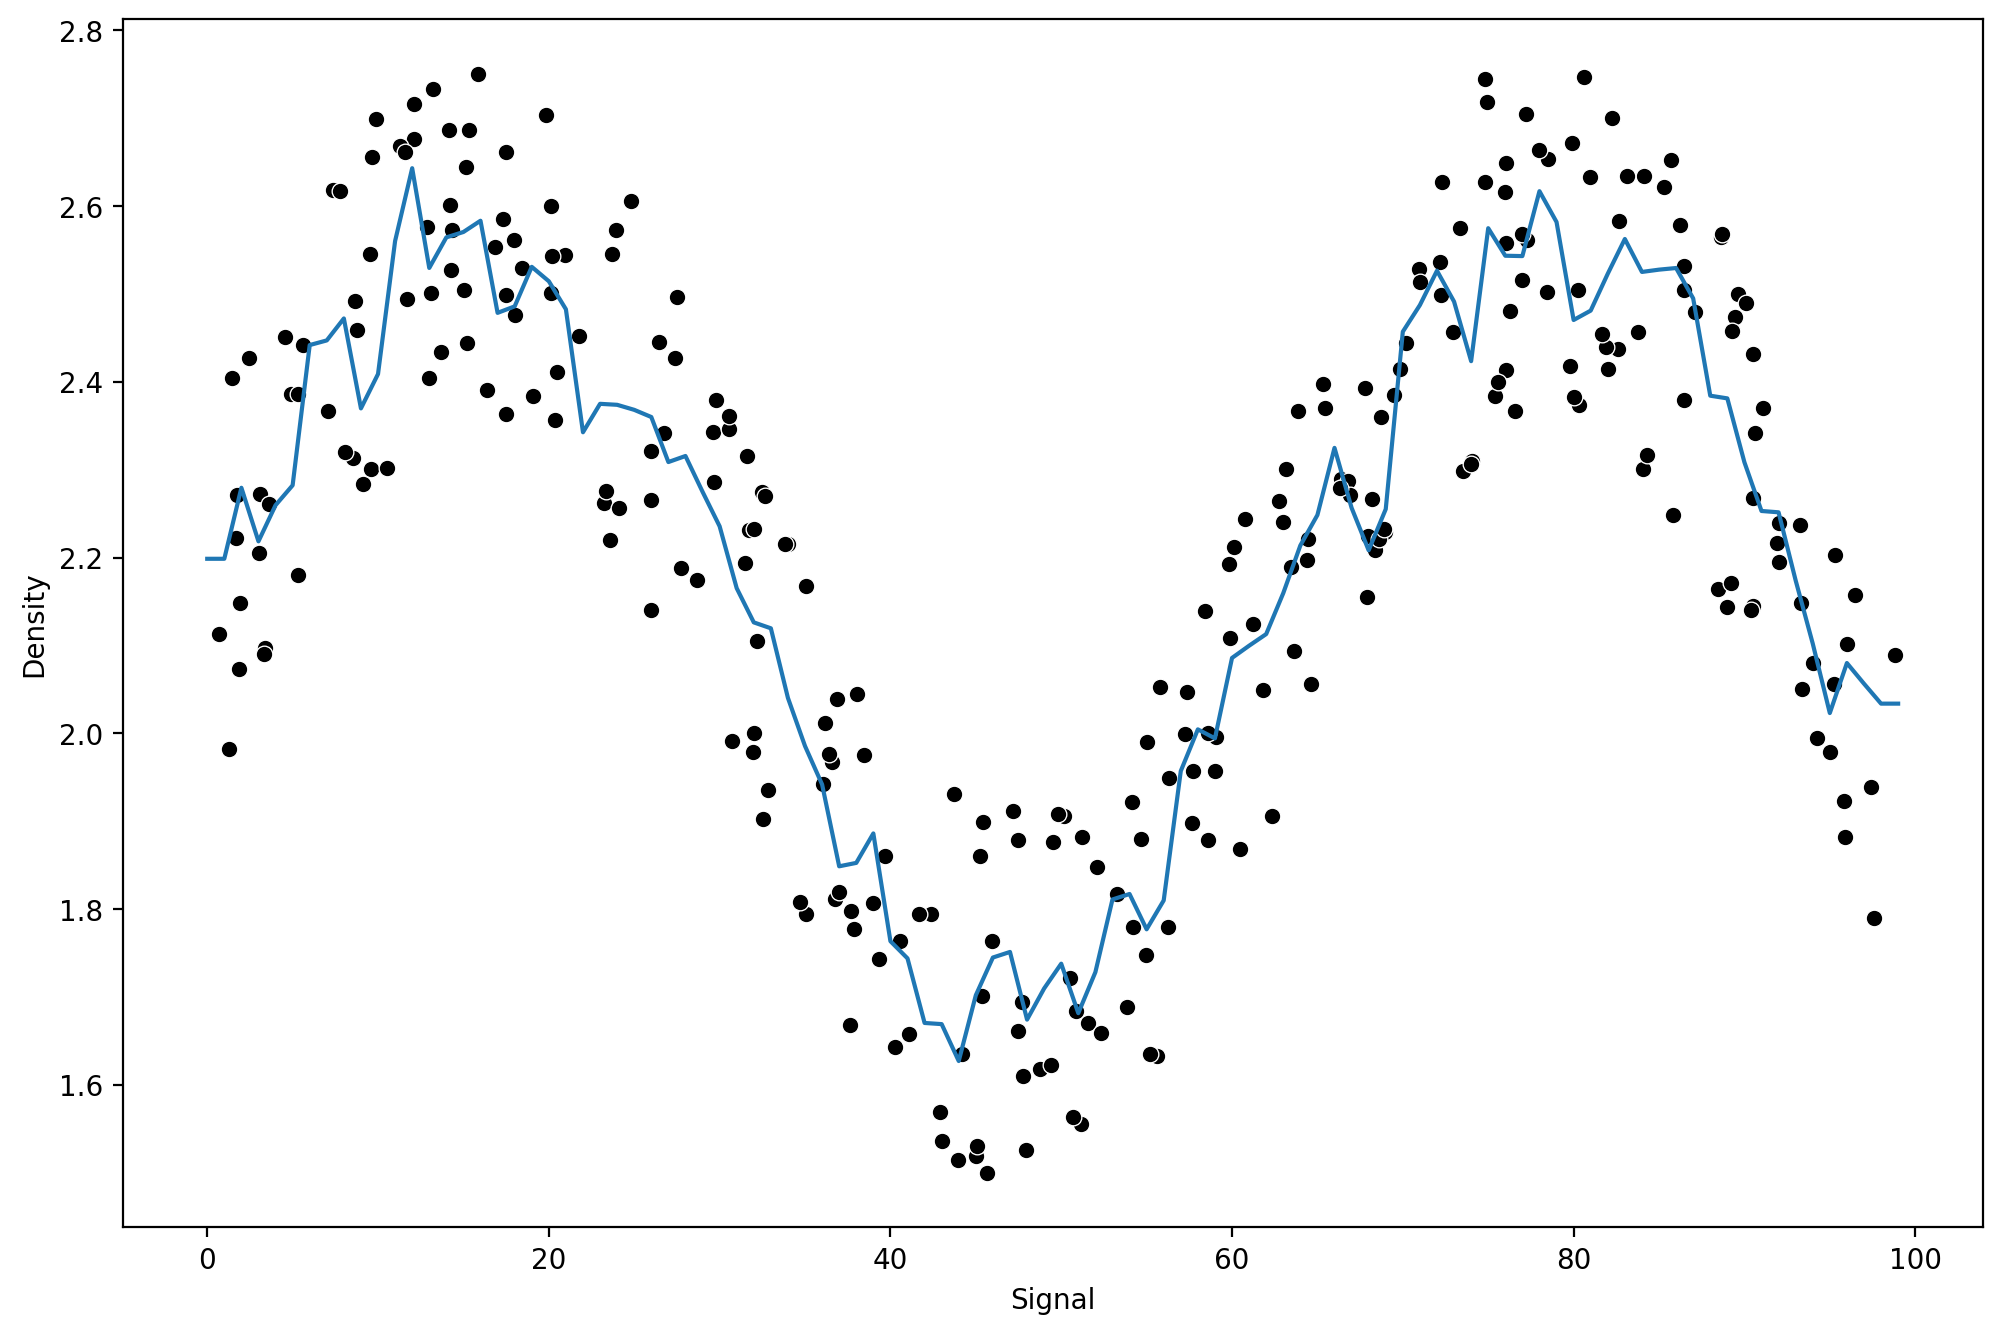

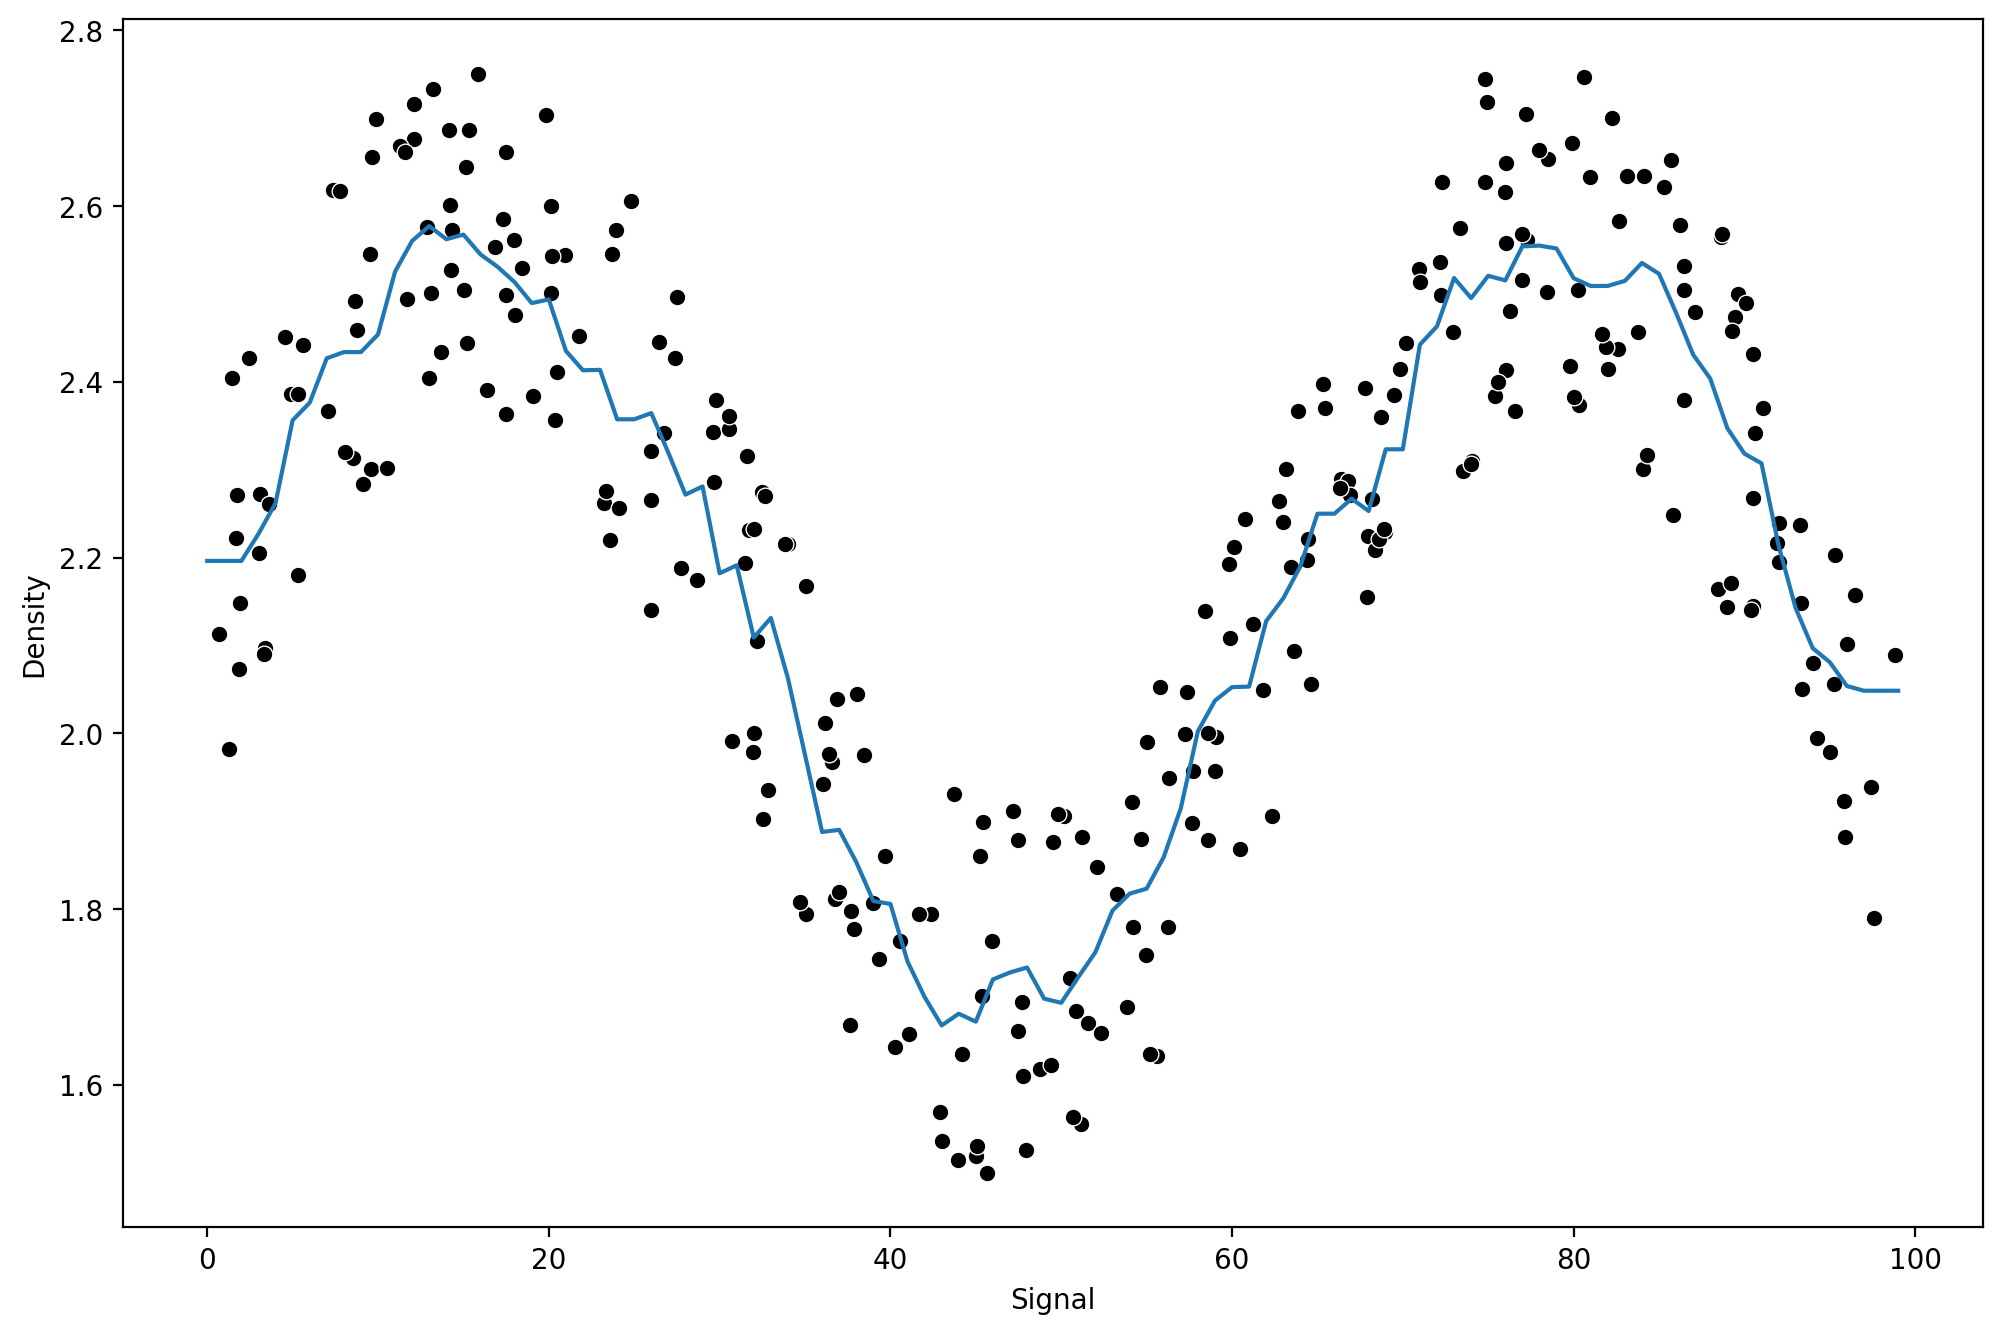

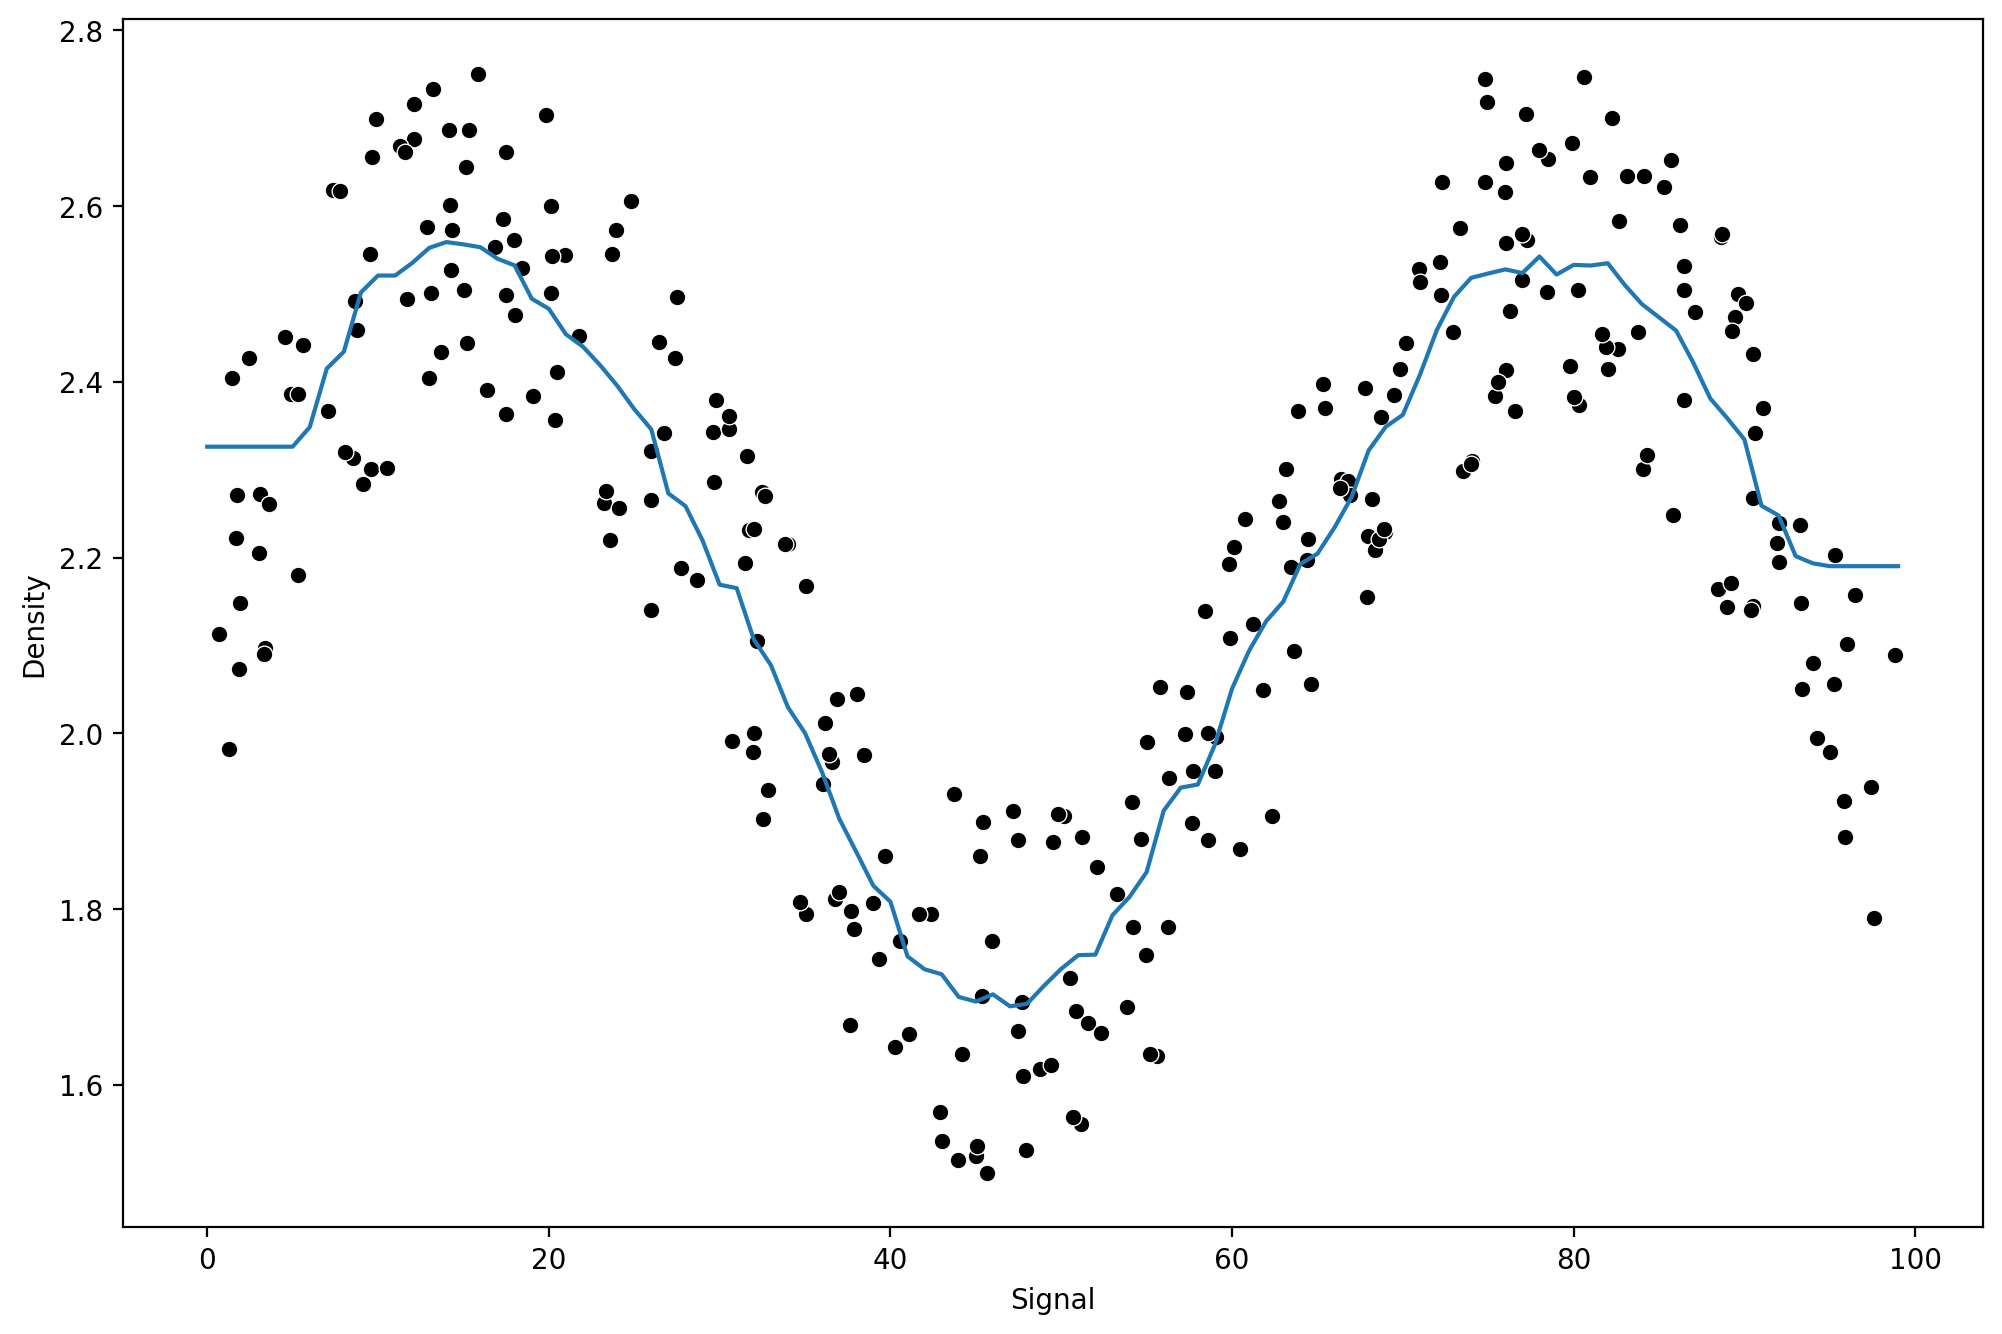

In [153]:
k_values = [1,5,11,25]

for n in k_values:
    model = KNeighborsRegressor(n_neighbors=n)
    run_model(model, X_train, y_train, X_test,y_test)

In [154]:
from  sklearn.tree import DecisionTreeRegressor

In [155]:
model = DecisionTreeRegressor()

MAE 0.1386845280313451
RMSE 0.17873661929385395


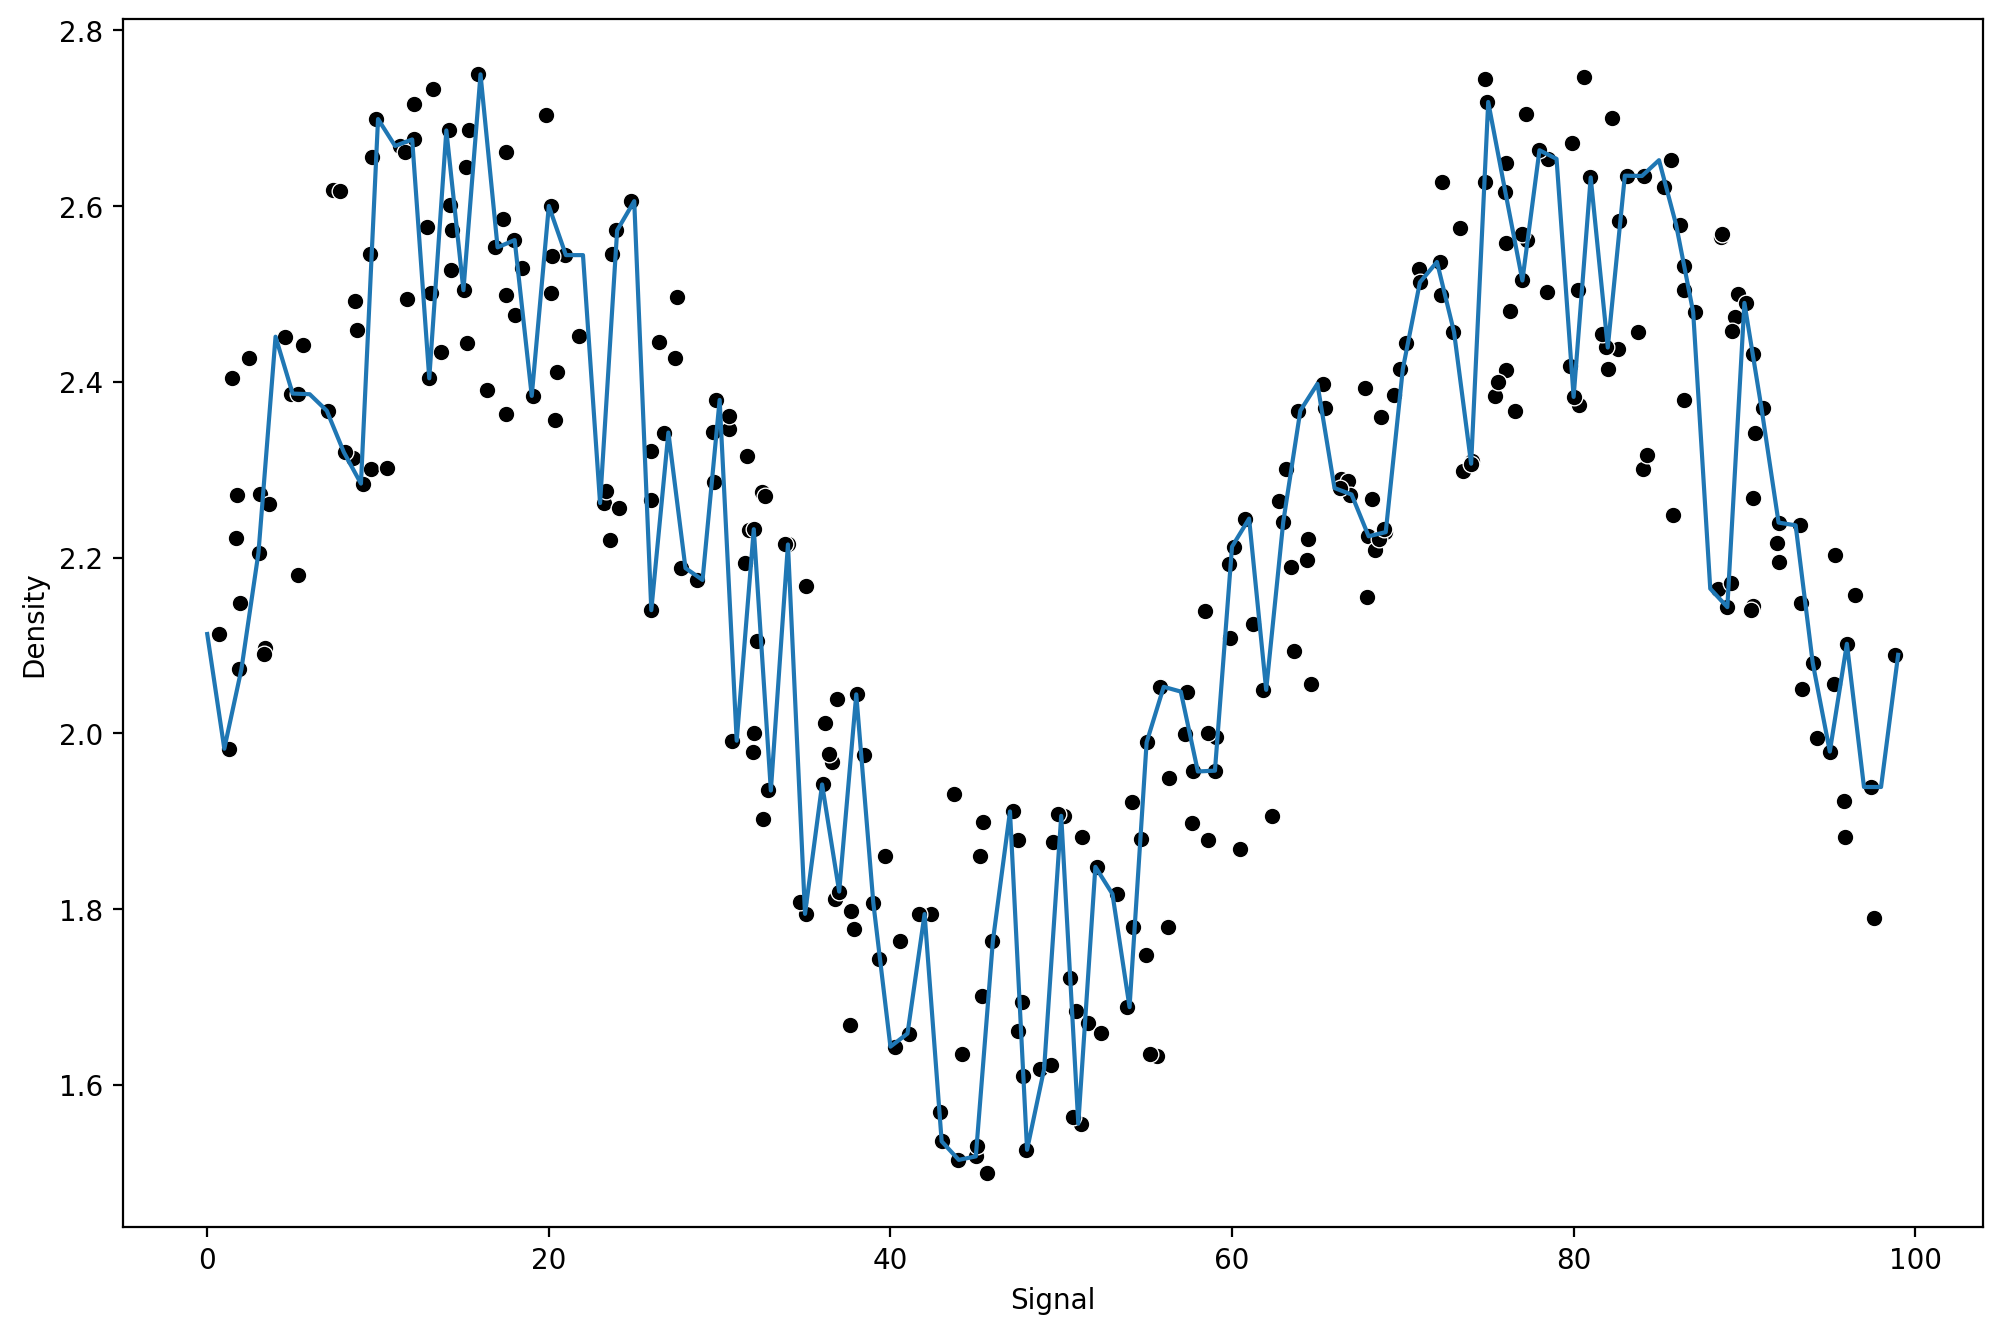

In [156]:
run_model(model, X_train, y_train, X_test,y_test)

In [157]:
from sklearn.svm import  SVR

In [158]:
svr = SVR()
param_grid = {'C':[0.01,0.1,1,5,10,100,1000],'gamma':['scale','auto']}



grid = GridSearchCV(svr, param_grid)

MAE 0.11396175186944646
RMSE 0.13225994979437194


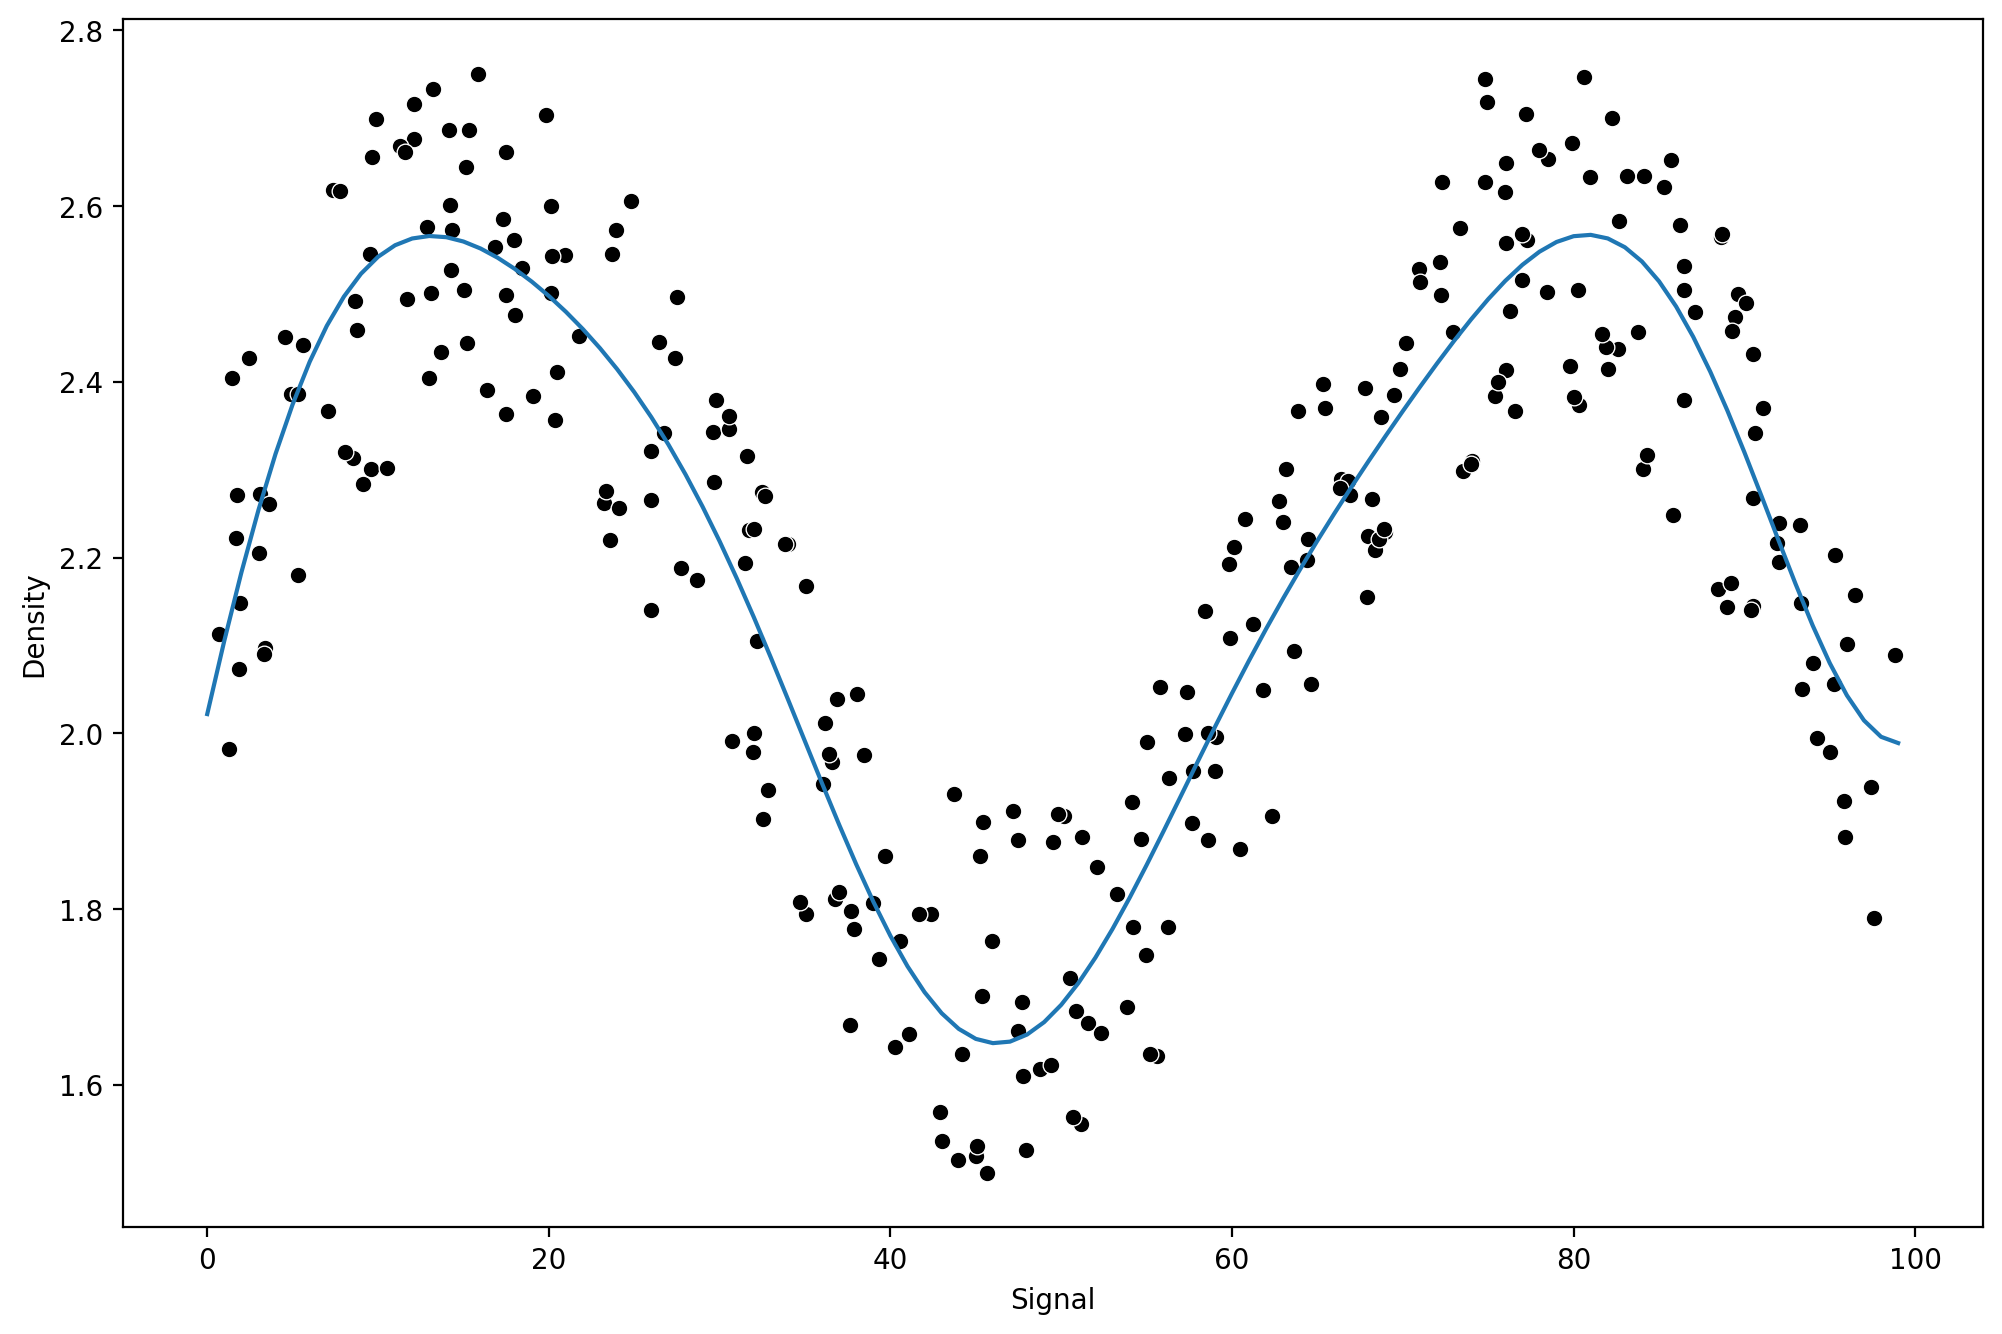

In [159]:
run_model(grid, X_train, y_train, X_test,y_test)

In [164]:
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor

In [165]:
model = GradientBoostingRegressor()

MAE 0.12096337183374009
RMSE 0.14421714091694157


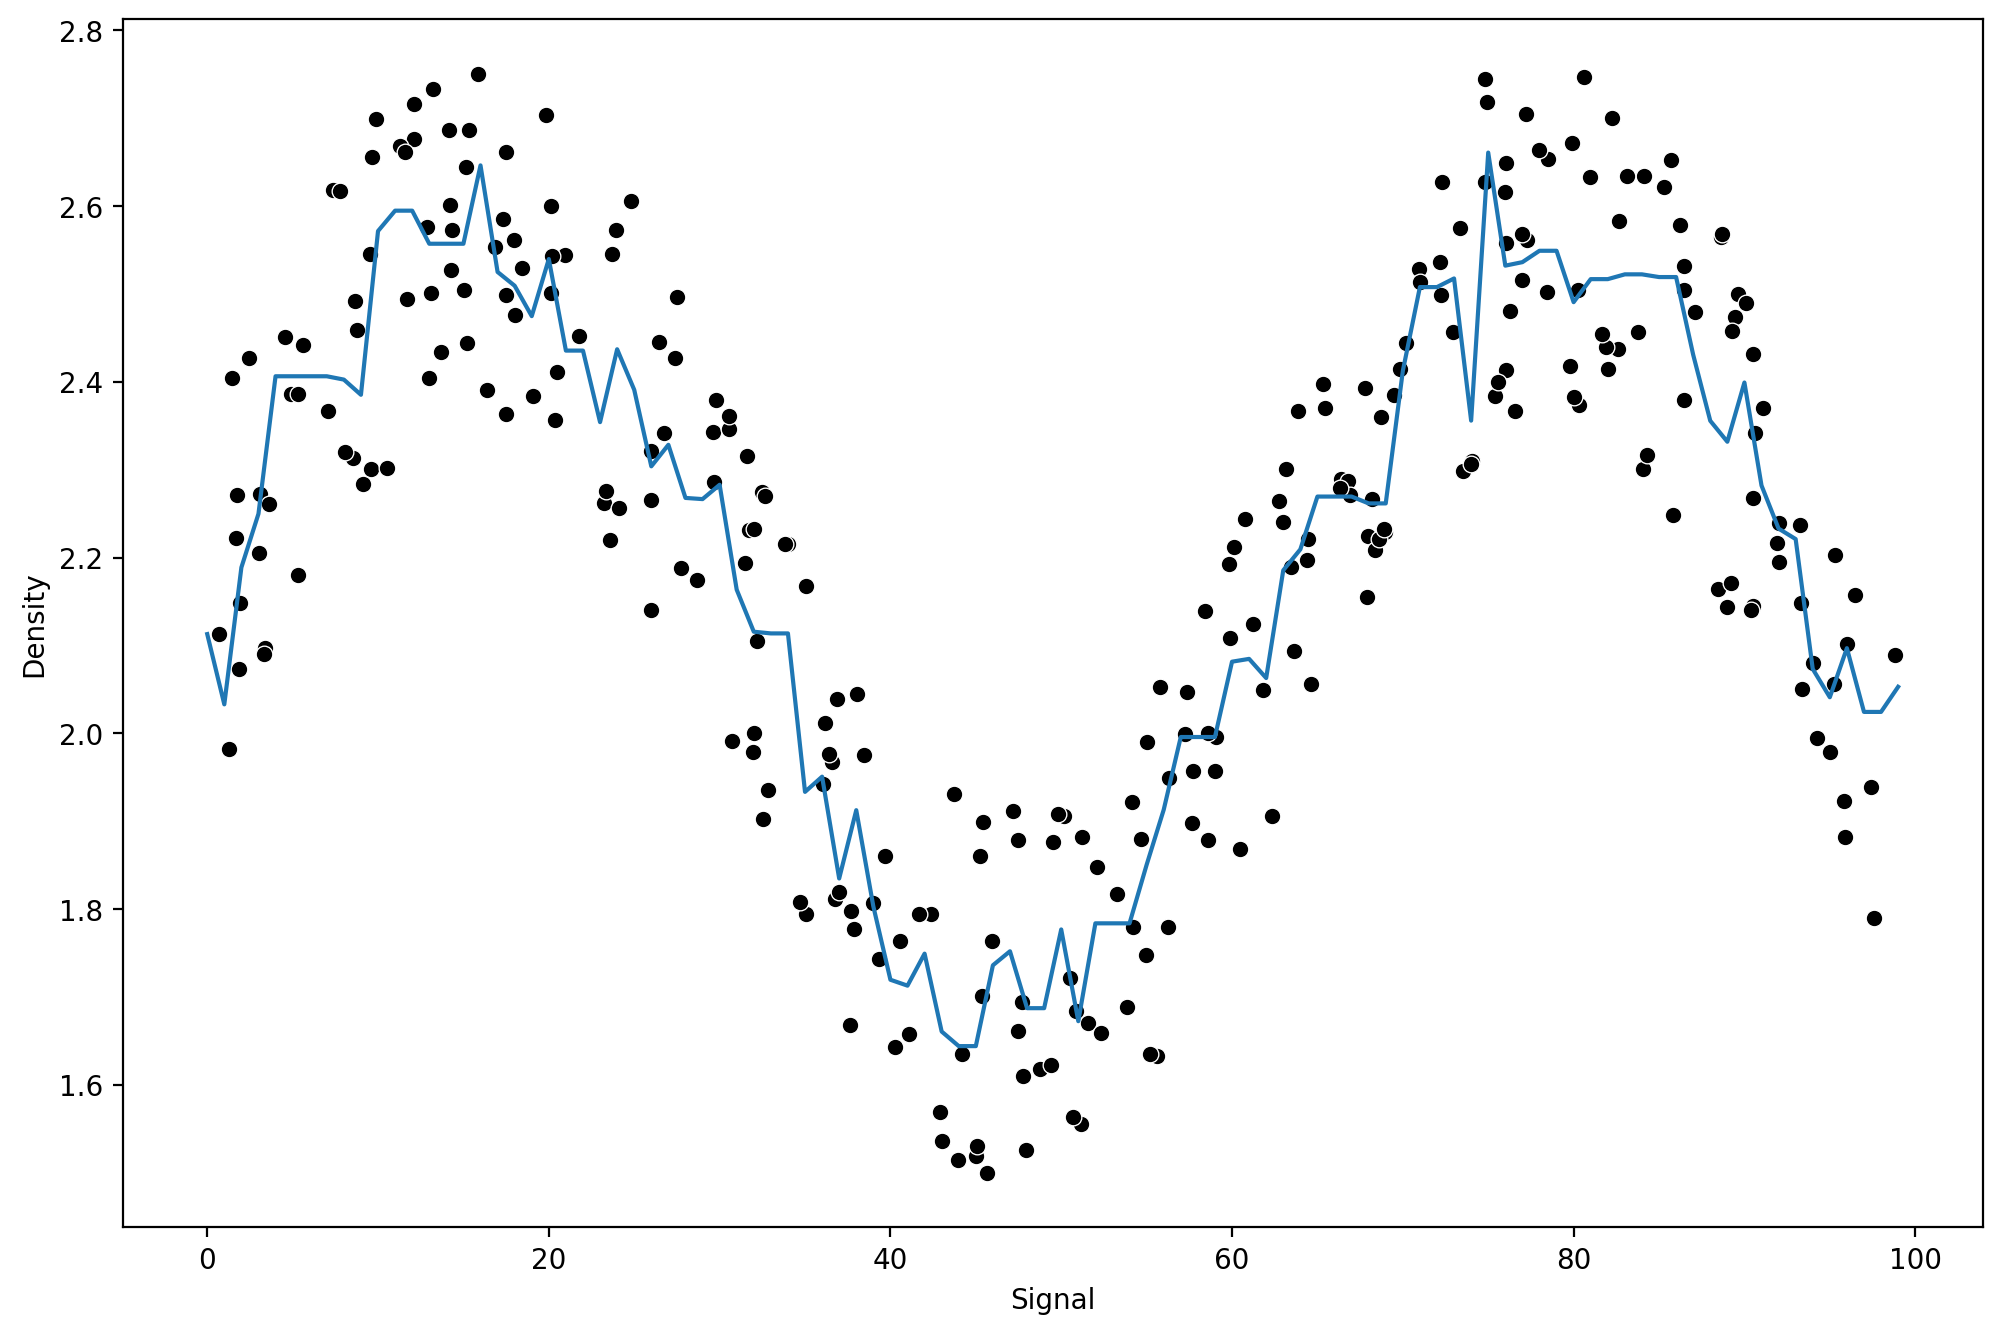

In [166]:
run_model(model, X_train, y_train, X_test,y_test)

In [167]:
model = AdaBoostRegressor()

MAE 0.12322055114580303
RMSE 0.14260172149810993


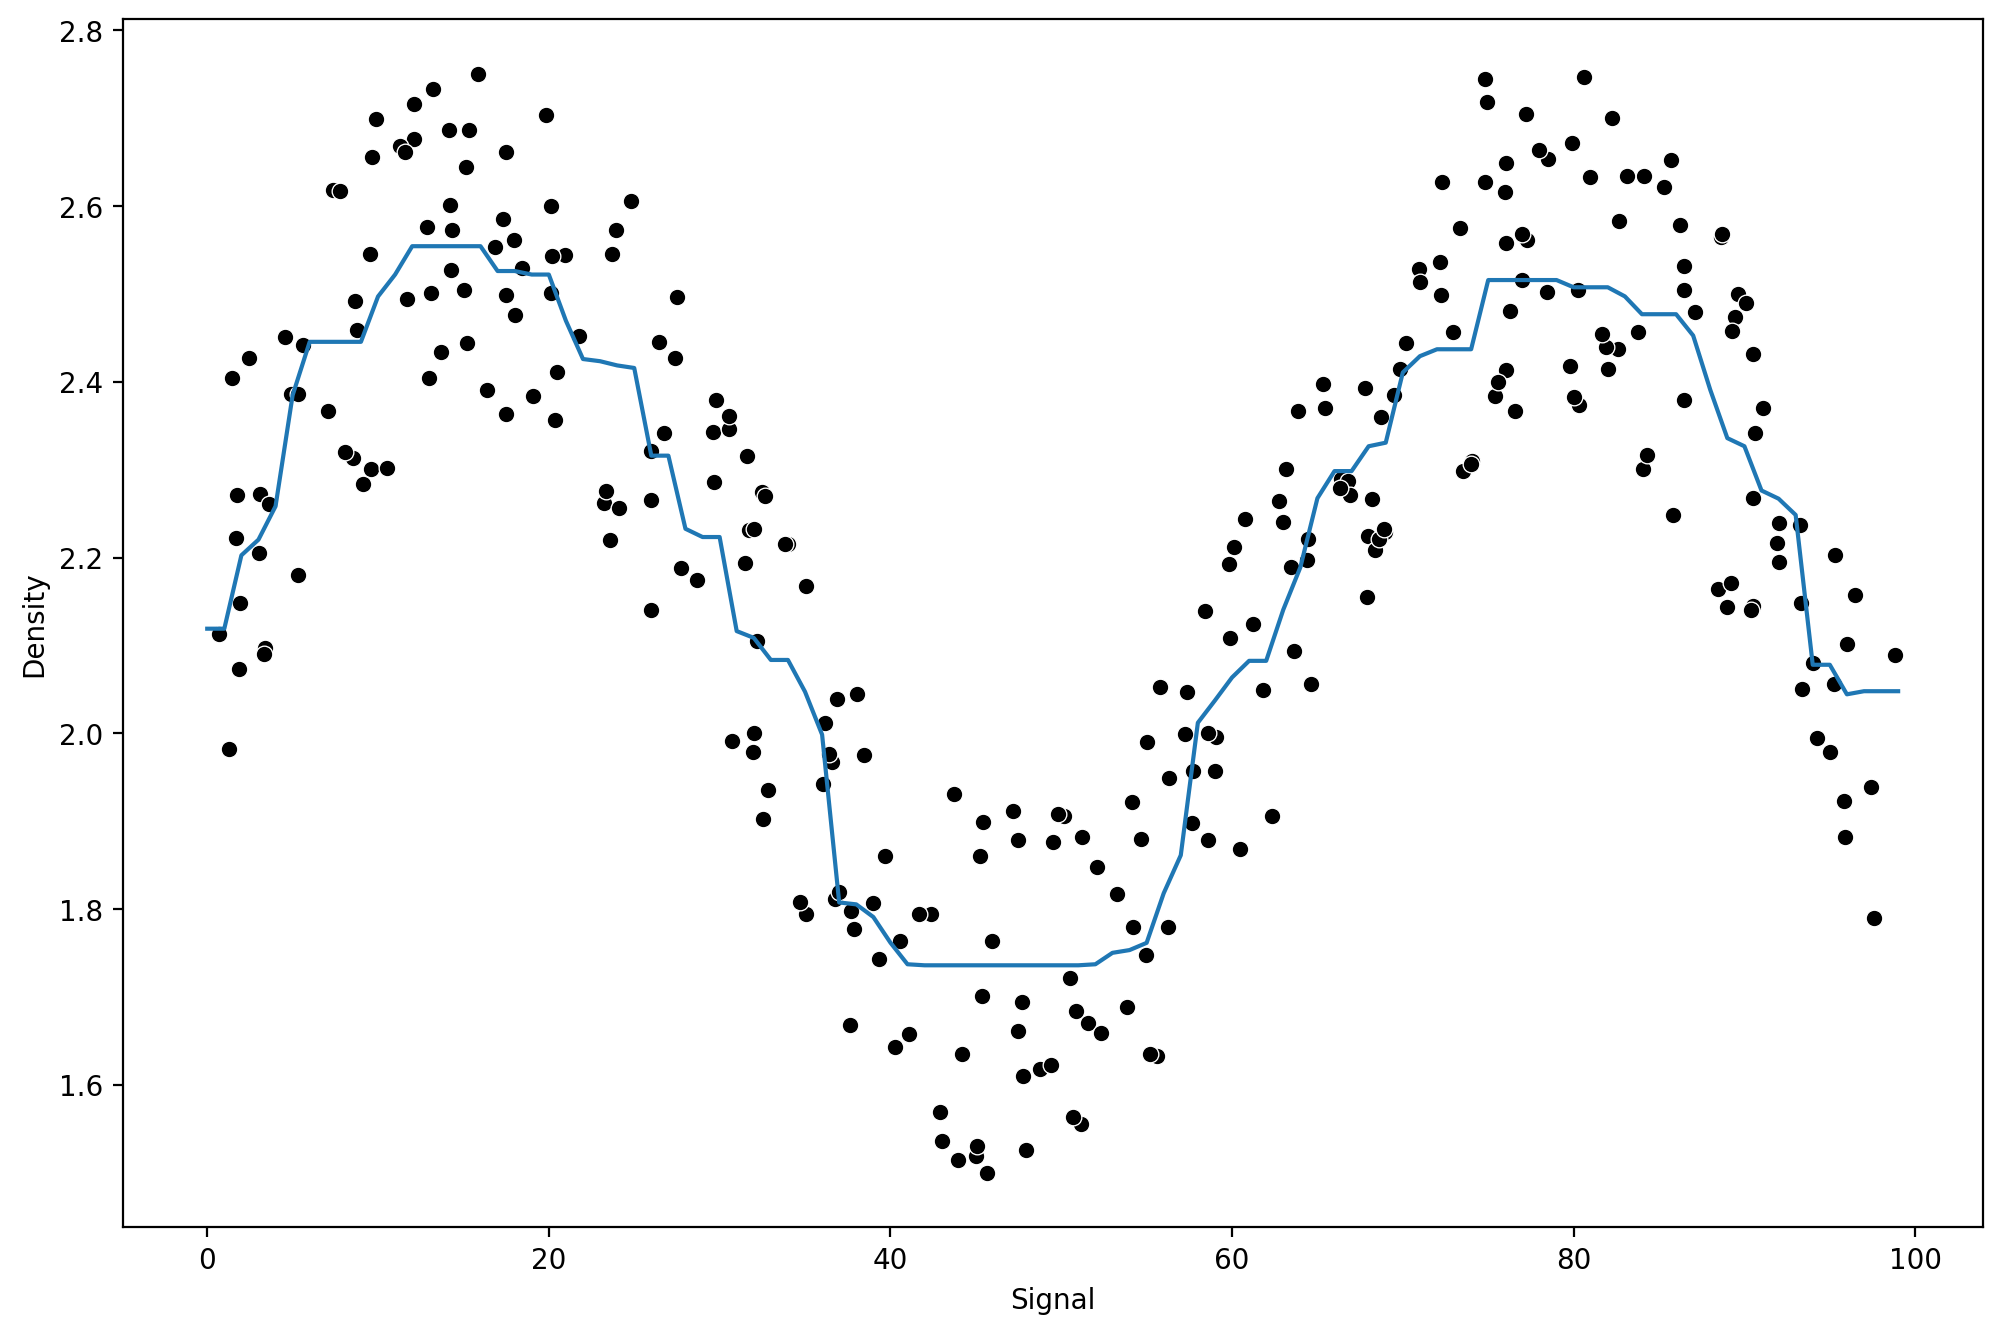

In [168]:
run_model(model, X_train, y_train, X_test,y_test)